# Контрольная работа

1. Познакомьтесь с возможностями библиотеки sklearn по загрузке датасетов из репозитория openml.org

In [175]:
from sklearn.datasets import fetch_openml
vine = fetch_openml(name='vineyard')

D:\Anaconda\lib\site-packages\sklearn\datasets\_openml.py:417: UserWarning: Multiple active versions of the dataset matching the name vineyard exist. Versions may be fundamentally different, returning version 1.
  warn(


2. Загрузите нужный вам датасет, выведите его основные характеристики: количество строк и столбцов, типы данных, количество значений в каждом столбце, основную статистическую информацию об атрибутах.


In [176]:
vdata = vine.data

In [177]:
vdata

,lugs_1989,lugs_1990
0,1.0,5.0
1,3.0,8.0
2,3.0,11.0
3,3.0,9.0
4,5.0,9.5
5,3.5,10.0
6,3.0,12.0
7,4.5,10.0
8,5.0,11.5
9,5.0,10.0


In [178]:
vdata.shape

(52, 2)

In [179]:
vdata.dtypes

lugs_1989    float64
lugs_1990    float64
dtype: object

In [180]:
vdata.describe()

,lugs_1989,lugs_1990
count,52.000000,52.000000
mean,3.278846,9.653846
std,1.938803,2.337961
min,0.000000,2.500000
25%,2.000000,8.000000
50%,3.000000,10.000000
75%,5.000000,11.000000
max,8.000000,14.000000


3. Прочитайте и изложите в работе общее описание датасета. Опишите, решаемую моделированием проблему.


In [181]:
vine.details

{'id': '192',
 'name': 'vineyard',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-04-23T13:16:12',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/3629/vineyard.arff',
 'parquet_url': 'http://openml1.win.tue.nl/dataset192/dataset_192.pq',
 'file_id': '3629',
 'default_target_attribute': 'lugs_1991',
 'row_id_attribute': 'row_number',
 'version_label': '1',
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset192/dataset_192.pq',
 'status': 'active',
 'processing_date': '2020-11-20 19:08:13',
 'md5_checksum': 'b261b616bccee824fb531e85007f2f90'}

Нужно предсказать значения следующего 1991 года для lugs(наконечников???)

4. Удалите, если нужно, нечисловые колонки в датасете.

Нечисловых колонок в датасете нет

5. При необходимости заполните нулем пропущенные значения.

In [182]:
vdata.isnull().sum()

lugs_1989    0
lugs_1990    0
dtype: int64

Нулевых значений нет

6. Постройте гистограммы распределения по каждому признаку.


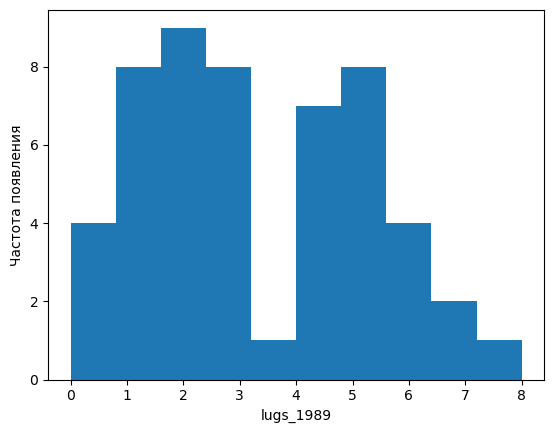

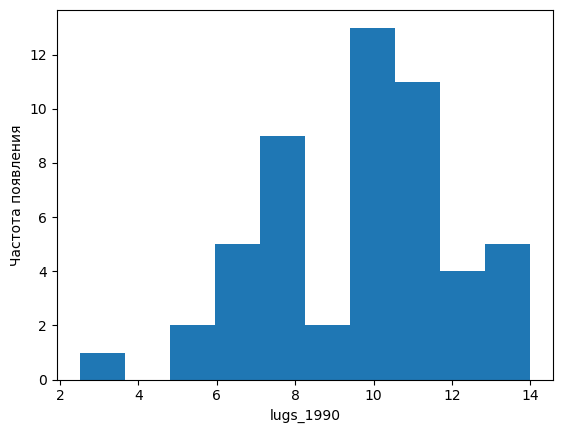

In [183]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.hist(vdata['lugs_1989'])
plt.xlabel('lugs_1989')
plt.ylabel('Частота появления')
plt.show()
plt.hist(vdata['lugs_1990'])
plt.xlabel('lugs_1990')
plt.ylabel('Частота появления')
plt.show()

7. Постройте модель машинного обучения, обучите ее на всем датасете.


In [184]:
x = vdata
y = vine.target

In [185]:
from sklearn.linear_model import LinearRegression
multiple = LinearRegression()
multiple.fit(x, y)

LinearRegression()

In [186]:
yy = multiple.predict(x)

8. Измерьте эффективность данной модели и сделайте вывод о ее применимости на практике.


In [187]:
multiple.coef_ , multiple.intercept_

(array([1.11940719, 0.65948872]), 8.049571812352088)

In [188]:
from sklearn.metrics import r2_score
r2_score(y, yy)

0.6174128699825736

Модель слишком плоха для применения ее на практике

9. Визуализируйте результаты моделирования, сравните реальные и предсказанные значения.


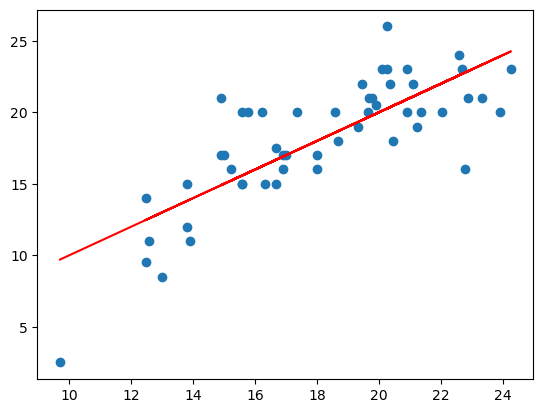

In [189]:
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

10. Используйте несколько простых моделей машинного обучения. Сравните их эффективность между собой.

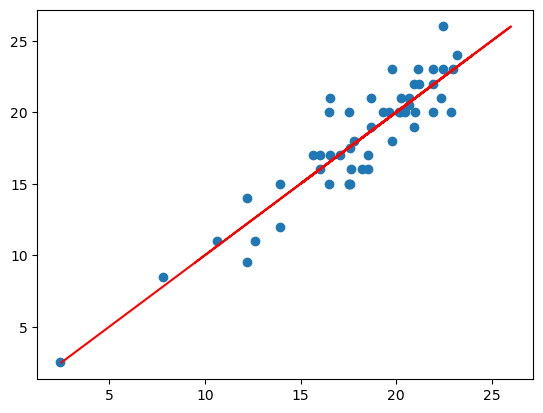

In [190]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5).fit_transform(x)
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)
plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')

In [191]:
polynomial.score(poly, y)

0.8407960560171378

Введение полиномиальных признаков значительно улучшило нашу модель

In [192]:
x = vdata
y = vine.target

In [193]:
from sklearn import svm
regr = svm.SVR()
regr.fit(x, y)
yy = regr.predict(x)

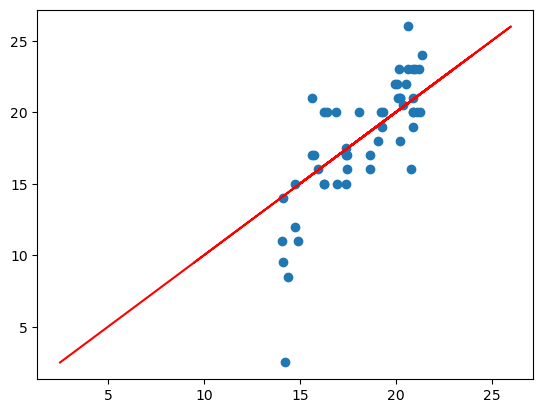

In [194]:
plt.scatter(yy, y)
plt.plot(y, y, c='r')

In [195]:
regr.score(x,y)

0.5581139966457443

Модель опорных векторов хуже линейной регресии